# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df= pd.merge(mouse_metadata,study_results,how="right", on="Mouse ID")

# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.  
number_mice= len(df["Mouse ID"].unique())
number_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse=df.loc[df.duplicated(['Mouse ID','Timepoint']),"Mouse ID"].unique()
dup_mouse


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
df[df['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID']!='g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

Mean_Tumor_Volume = clean_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].mean()
Median_Tumor_Volume = clean_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].median()
var_Tumor_Volume = clean_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].var()
std_Tumor_Volume = clean_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].std()
sem_Tumor_Volume = clean_df.groupby(by='Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({"Mean Tumor Volume":Mean_Tumor_Volume,
                          "Median Tumor Volume":Median_Tumor_Volume,
                          "Tumor Volume Variance":var_Tumor_Volume,
                          "Tumor Volume Std. Dev.":std_Tumor_Volume,
                          "Tumor Volume Std. Err.":sem_Tumor_Volume})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_df=clean_df.groupby(by='Drug Regimen').agg({
    "Tumor Volume (mm3)": ["mean","median","var","std","sem"]
})
summary_df


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64
<class 'pandas.core.series.Series'>


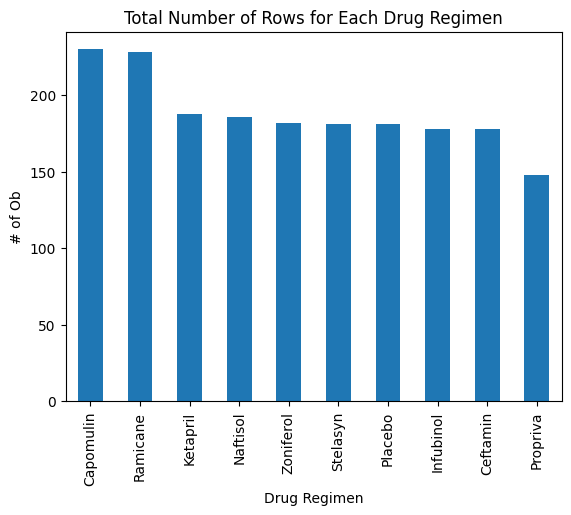

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Count the number of rows for each drug regimen
drug_counts = clean_df['Drug Regimen'].value_counts()

# Sort the drug counts in descending order
sorted_drug_counts = drug_counts.sort_values(ascending=False)

print(sorted_drug_counts)
print(type(sorted_drug_counts))

# Create a bar plot using Pandas
sorted_drug_counts.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Ob')
# Show the plot
plt.show()

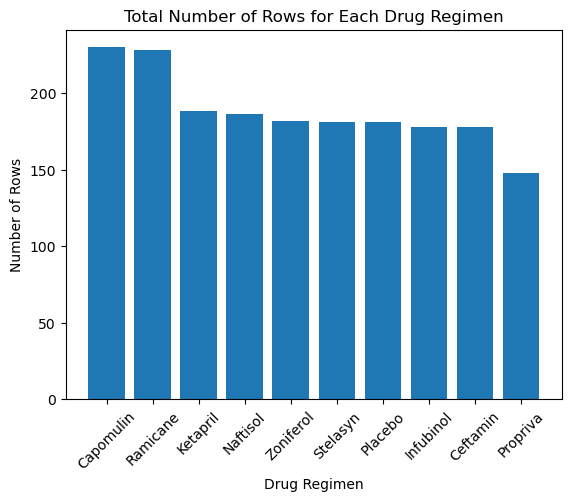

In [35]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Count the number of rows for each drug regimen
drug_counts = clean_df['Drug Regimen'].value_counts()

# Sort the drug counts in descending order
sorted_drug_counts = drug_counts.sort_values(ascending=False)

# Create a bar plot using pyplot
plt.figure()
plt.bar(sorted_drug_counts.index, sorted_drug_counts)

# Set the plot title and axis labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


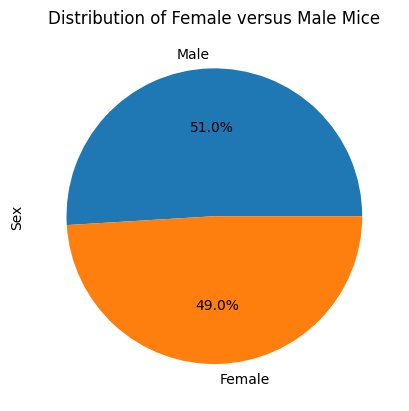

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
import matplotlib.pyplot as plt

# Count the number of male and female mice
gender_counts = clean_df['Sex'].value_counts()

# Create a pie plot using Pandas
gender_counts.plot(kind='pie', autopct='%1.1f%%')

# Set the plot title
plt.title('Distribution of Female versus Male Mice')


plt.gca().set_aspect('equal')

# Show the plot
plt.show()


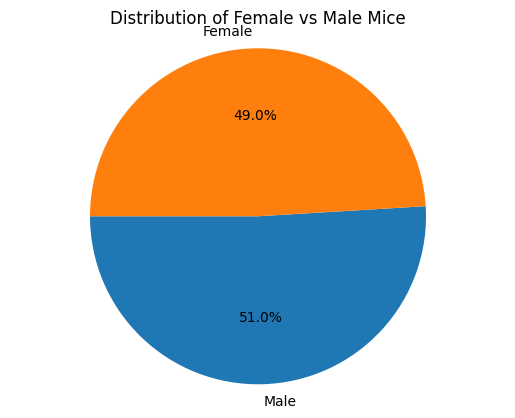

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the count of female and male mice
gender_counts = clean_df['Sex'].value_counts()

# Extract gender labels and counts
genders = gender_counts.index
counts = gender_counts.values

# Generate the pie plot using pyplot
plt.pie(counts, labels=genders, autopct='%1.1f%%', startangle=180)
plt.title('Distribution of Female vs Male Mice')
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin
four_treatment_regimens = ['Capomulin','Ramicane','Infubinol','Ceftamin']
clean4_df=clean_df[clean_df['Drug Regimen'].isin(four_treatment_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
mouse_greatest_time_df=clean4_df.groupby(by='Mouse ID')[['Timepoint']].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

mouse_greatest_time_df = mouse_greatest_time_df.reset_index()
final_tumor_volume_df=pd.merge(left=clean4_df,right=mouse_greatest_time_df,on=['Mouse ID','Timepoint'])
final_tumor_volume_df.head()

# # Create a DataFrame with the last timepoint for each mouse
# last_timepoint_df = pd.DataFrame(last_timepoint)

# # Merge the last timepoint DataFrame with the original DataFrame to get the tumor volume at the last timepoint
# final_tumor_volume = pd.merge(last_timepoint_df, clean_df, on=['Mouse ID', 'Timepoint'])#拼接

# # Filter for the desired treatment regimens
# treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(treatment_regimens)]

# # # Display the DataFrame with the final tumor volume of each mouse
# # print(final_tumor_volume)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,u153,Ceftamin,Female,11,25,0,45.000000,0
1,b447,Ceftamin,Male,2,30,0,45.000000,0
2,x226,Ceftamin,Male,23,28,0,45.000000,0
3,t573,Ceftamin,Female,15,27,0,45.000000,0
4,c326,Infubinol,Female,18,25,5,36.321346,0


In [18]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Check for potential outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print potential outliers
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


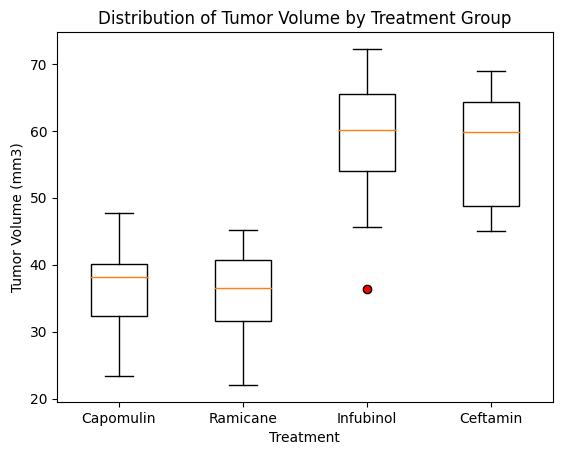

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list of tumor volume data for each treatment group

tumor_vol_data = [final_tumor_volume_df[final_tumor_volume_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]

# Create a figure and axes for the box plot
fig, ax = plt.subplots()

# Create the box plot
bp = ax.boxplot(tumor_vol_data, labels=treatments, patch_artist=True)


for box in bp['boxes']:
    box.set(facecolor='white')


for flier in bp['fliers']:
    flier.set(markerfacecolor='white', markeredgecolor='black')


bp['fliers'][2].set(markerfacecolor='red', markeredgecolor='black')

# Set the title and labels
ax.set_title('Distribution of Tumor Volume by Treatment Group')
ax.set_xlabel('Treatment')
ax.set_ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()



## Line and Scatter Plots

230      0
349      5
702     10
846     15
1107    20
1162    25
1366    30
1517    35
1741    40
1846    45
Name: Timepoint, dtype: int64


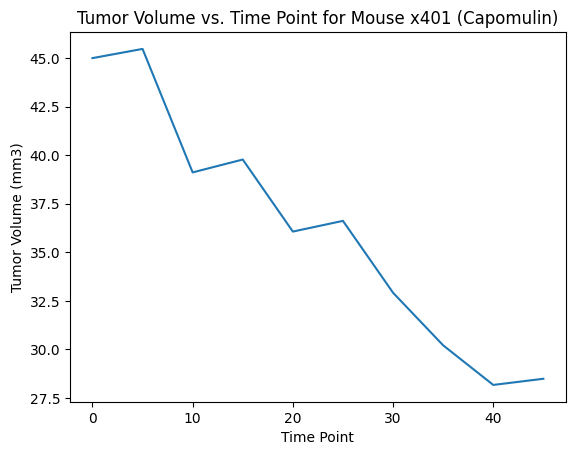

In [31]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Choose a single mouse ID treated with Capomulin
mouse_id = "x401"

# Filter the data for the chosen mouse and Capomulin treatment
mouse_data = clean_df[(clean_df['Mouse ID'] == mouse_id) & (clean_df['Drug Regimen'] == 'Capomulin')]

print(mouse_data['Timepoint'])
# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])

# Set the x-axis ticks
#plt.xticks([0, 10, 20, 30, 40])

# Set the title and labels
plt.title(f"Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")

# # Show the plot
plt.show()



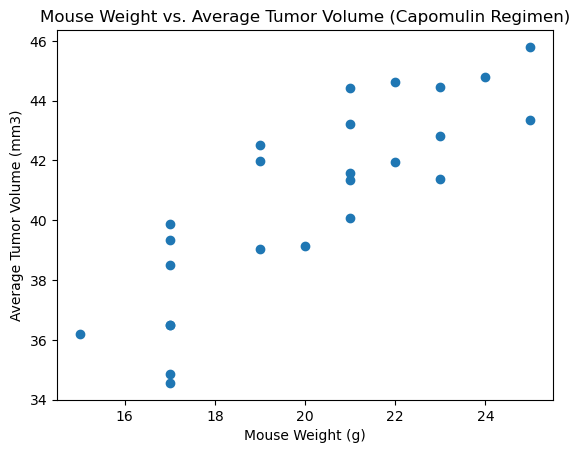

In [27]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

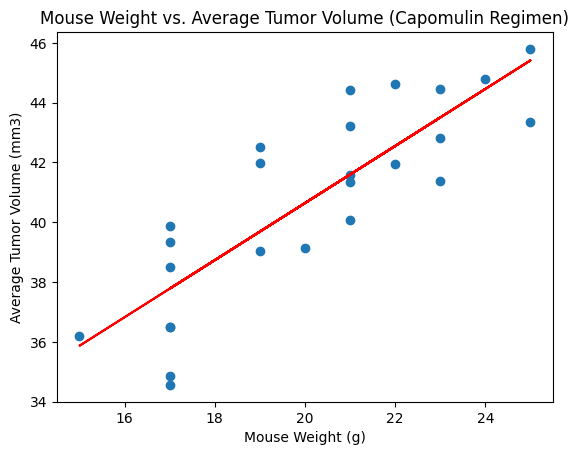

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Filter the data for the Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the corresponding mouse weight for each mouse
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()

# Calculate the correlation coefficient
correlation = mouse_weight.corr(average_tumor_volume)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, average_tumor_volume)

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume)

# Add the linear regression line to the plot
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()

# # Print the correlation coefficient
# print("Correlation Coefficient:", correlation)

# # Print the linear regression results
# print("Linear Regression:")
# print("Slope:", slope)
# print("Intercept:", intercept)
# print("R-value:", r_value)
# print("P-value:", p_value)
# print("Standard Error:", std_err)
